# Check .nii.gz File

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os
from ipywidgets import interact, IntSlider

In [24]:
# 1. DEFINE PATH
# DATA_PATH = "/home/minsukc/MRI2CT/data/1ABB116_3x3x3_resampled/ct_resampled.nii.gz"
# DATA_PATH = "/scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/AB/1ABB116/ct.nii.gz"
# DATA_PATH = "/scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/TH/1THA001/ct.nii.gz"
DATA_PATH = "/scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/HN/1HNA001/ct.nii.gz"

if not os.path.exists(DATA_PATH):
    print(f"❌ ERROR: File not found at: {DATA_PATH}")
else:
    print(f"✅ SUCCESS: File found at {DATA_PATH}")

✅ SUCCESS: File found at /scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/HN/1HNA001/ct.nii.gz


In [25]:
# Load the image
image = sitk.ReadImage(DATA_PATH)

# Get the raw numpy array
# NOTE: SimpleITK image is (x, y, z), but numpy array is (z, y, x)
array = sitk.GetArrayFromImage(image)

print("--- 📋 Volume Metadata ---")
print(f"Image Size (x, y, z): {image.GetSize()}")
print(f"Numpy Shape (z, y, x): {array.shape}")
print(f"Spacing (mm):         {image.GetSpacing()}")
print(f"Origin:               {image.GetOrigin()}")
print(f"Direction (Cosine):   {image.GetDirection()}")
print(f"Pixel Type:           {image.GetPixelIDTypeAsString()}")

print("\n--- 📊 Intensity Statistics ---")
print(f"Min Intensity: {np.min(array)}")
print(f"Max Intensity: {np.max(array)}")
print(f"Mean:          {np.mean(array):.2f}")
print(f"Std Dev:       {np.std(array):.2f}")

--- 📋 Volume Metadata ---
Image Size (x, y, z): (533, 390, 118)
Numpy Shape (z, y, x): (118, 390, 533)
Spacing (mm):         (1.0, 1.0, 3.0)
Origin:               (-261.1260070800781, -162.39999389648438, -168.0)
Direction (Cosine):   (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type:           16-bit signed integer

--- 📊 Intensity Statistics ---
Min Intensity: -1024
Max Intensity: 3071
Mean:          -839.20
Std Dev:       385.23


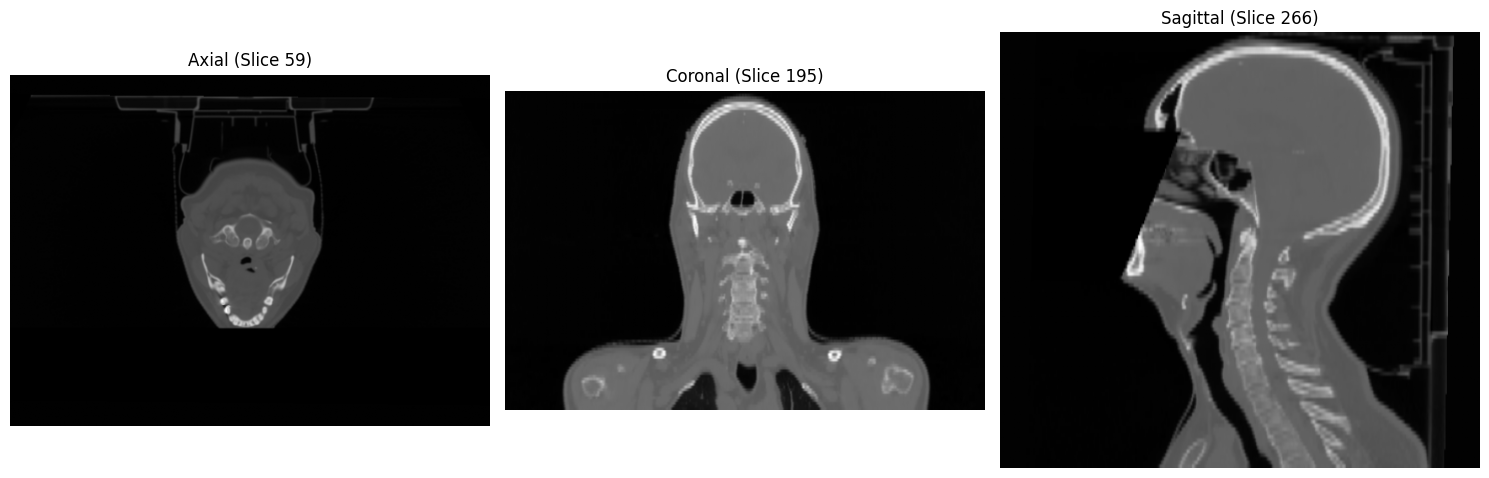

In [26]:
# Calculate middle slices
z_mid = array.shape[0] // 2
y_mid = array.shape[1] // 2
x_mid = array.shape[2] // 2

# Aspect ratios for plotting (to handle non-square pixels)
spacing = image.GetSpacing() # (x, y, z)
aspect_ax = spacing[1] / spacing[0] 
aspect_sag = spacing[2] / spacing[1]
aspect_cor = spacing[2] / spacing[0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial (Top-down)
axes[0].imshow(array[z_mid, :, :], cmap='gray', origin='lower', aspect=aspect_ax)
axes[0].set_title(f'Axial (Slice {z_mid})')
axes[0].axis('off')

# Coronal (Front-back) -> Slicing Y
# We flip vertically because numpy origin is top-left, medical is bottom-left
axes[1].imshow(np.flipud(array[:, y_mid, :]), cmap='gray', aspect=aspect_cor)
axes[1].set_title(f'Coronal (Slice {y_mid})')
axes[1].axis('off')

# Sagittal (Side-side) -> Slicing X
axes[2].imshow(np.flipud(array[:, :, x_mid]), cmap='gray', aspect=aspect_sag)
axes[2].set_title(f'Sagittal (Slice {x_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

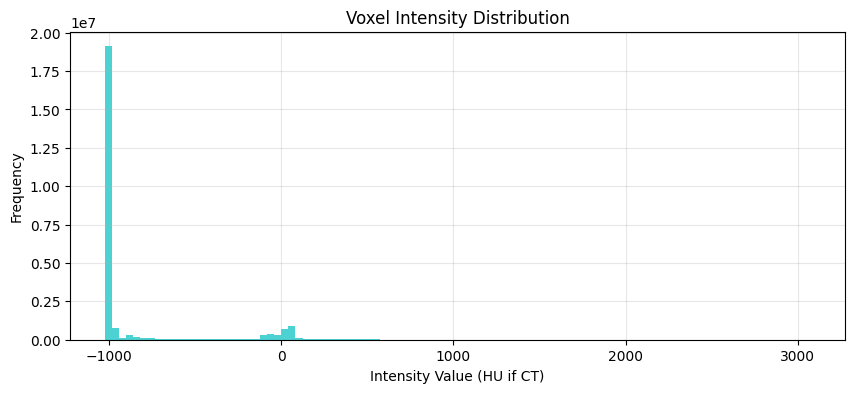

In [27]:
plt.figure(figsize=(10, 4))
plt.hist(array.flatten(), bins=100, color='c', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity Value (HU if CT)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [28]:
def explore_slices(slice_idx):
    plt.figure(figsize=(8, 8))
    # Display Axial View
    plt.imshow(array[slice_idx, :, :], cmap='gray', origin='lower')
    plt.title(f"Axial Slice: {slice_idx}")
    plt.axis('off')
    plt.show()

interact(
    explore_slices, 
    slice_idx=IntSlider(
        min=0, 
        max=array.shape[0]-1, 
        step=1, 
        value=array.shape[0]//2,
        description='Z-Slice:'
    )
);

interactive(children=(IntSlider(value=59, description='Z-Slice:', max=117), Output()), _dom_classes=('widget-i…

# Check Segmentation

In [4]:
import matplotlib.pyplot as plt
import os
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np

In [5]:
DATA_ROOT = "/home/minsukc/MRI2CT/data/1ABA005_3.0x3.0x3.0_resampled"

<function matplotlib.pyplot.show(close=None, block=None)>

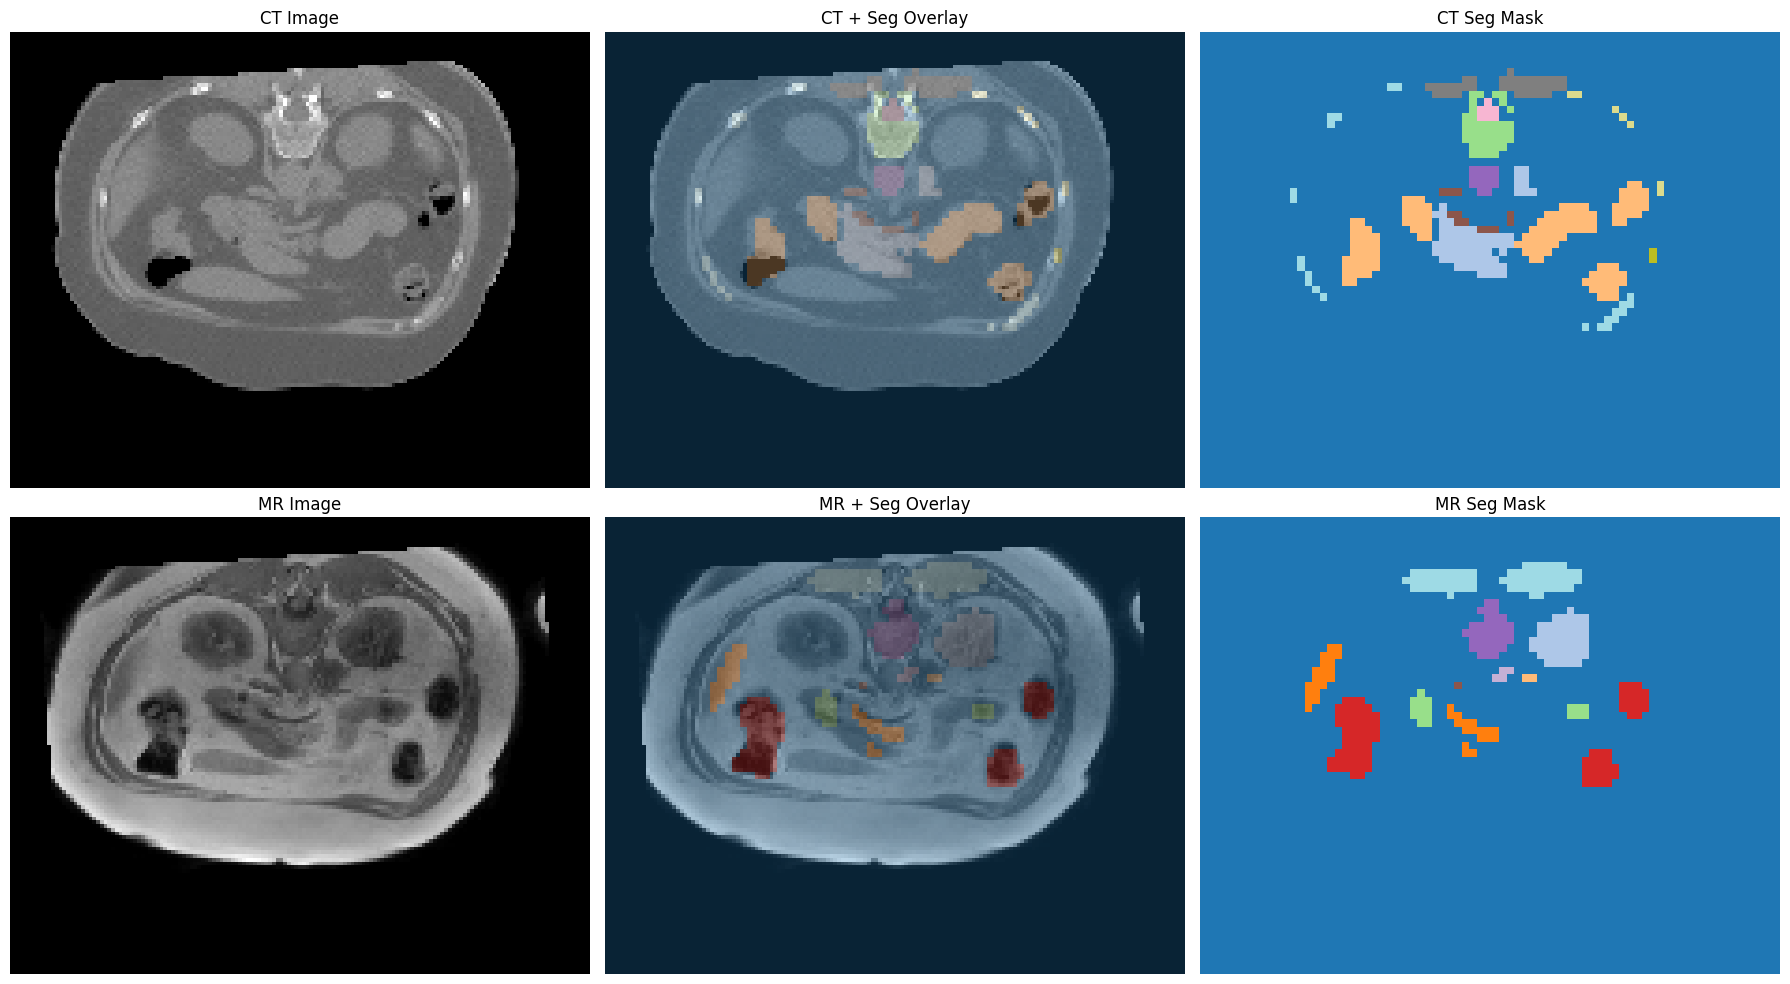

In [6]:
ct_path = os.path.join(DATA_ROOT, "ct_resampled.nii.gz")
mr_path = os.path.join(DATA_ROOT, "mr_resampled.nii.gz")
ct_seg_path = os.path.join(DATA_ROOT, "ct_seg.nii.gz")
mr_seg_path = os.path.join(DATA_ROOT, "mr_seg.nii.gz")

ct_data = nib.load(ct_path).get_fdata()
ct_seg = nib.load(ct_seg_path).get_fdata()
mr_data = nib.load(mr_path).get_fdata()
mr_seg = nib.load(mr_seg_path).get_fdata()

# Normalize for display
ct_disp = np.clip(ct_data, -450, 450)
ct_disp = (ct_disp - ct_disp.min()) / (ct_disp.max() - ct_disp.min() + 1e-8)
mr_disp = (mr_data - mr_data.min()) / (mr_data.max() - mr_data.min() + 1e-8)

# Pick middle slice
sliceidx = ct_data.shape[2] // 2

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# CT Row
axs[0,0].imshow(np.rot90(ct_disp[:, :, sliceidx]), cmap="gray")
axs[0,0].set_title("CT Image")
axs[0,1].imshow(np.rot90(ct_disp[:, :, sliceidx]), cmap="gray")
axs[0,1].imshow(np.rot90(ct_seg[:, :, sliceidx]), cmap="tab20", alpha=0.3)
axs[0,1].set_title("CT + Seg Overlay")
axs[0,2].imshow(np.rot90(ct_seg[:, :, sliceidx]), cmap="tab20")
axs[0,2].set_title("CT Seg Mask")

# MR Row
axs[1,0].imshow(np.rot90(mr_disp[:, :, sliceidx]), cmap="gray")
axs[1,0].set_title("MR Image")
axs[1,1].imshow(np.rot90(mr_disp[:, :, sliceidx]), cmap="gray")
axs[1,1].imshow(np.rot90(mr_seg[:, :, sliceidx]), cmap="tab20", alpha=0.3)
axs[1,1].set_title("MR + Seg Overlay")
axs[1,2].imshow(np.rot90(mr_seg[:, :, sliceidx]), cmap="tab20")
axs[1,2].set_title("MR Seg Mask")

for ax in axs.flatten(): ax.axis('off')

plt.tight_layout()
plt.show